In [60]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data separation/transformation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# system manipulation
import sys
sys.path.append("../util_")
import acquire_
import prepare_

# other
import warnings
warnings.filterwarnings("ignore")

In [15]:
wine = pd.read_csv('00_wine_original_data.csv')

In [16]:
wine.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0            7.4              0.70         0.00             1.9   
1           1            7.8              0.88         0.00             2.6   
2           2            7.8              0.76         0.04             2.3   
3           3           11.2              0.28         0.56             1.9   
4           4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality wine_clr  
0       0.56      9.4        5      red  
1       0.68      9.8        5      red  
2       0.65      9.8        5      red  
3       0.58      9.8        6      red  
4       0.56      9.4        5      red

In [19]:
# create dummie variables
dummies = pd.get_dummies(wine.wine_clr)

# clean dummie column names
dummies_col = dummies.columns.str.replace(" ", "_").str.lower()

dummies.head(2)

red  white
0    1      0
1    1      0

In [20]:
# make a copy of my original data frame ti keep integrity of data
original_clean_wine = wine.copy()

# add dummies to my data frame
wine[dummies_col] = dummies
wine.head(2)

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0            7.4              0.70          0.0             1.9   
1           1            7.8              0.88          0.0             2.6   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   

   sulphates  alcohol  quality wine_clr  red  white  
0       0.56      9.4        5      red    1      0  
1       0.68      9.8        5      red    1      0

In [22]:
# split the data into training, validation and testing sets
train, validate, test = prepare_.split_data_(df=wine,
                    test_size=0.2, 
                     validate_size=0.2,
                    stratify_col= "quality",
                     random_state=95)
(train.shape, validate.shape, test.shape)

((3897, 16), (1300, 16), (1300, 16))

In [23]:
prepare_.save_split_data_(original_df=original_clean_wine,
                          encoded_scaled_df=wine, 
                          train=train, 
                          validate=validate, 
                          test=test,
                         test_size=0.2,
                         stratify_col= "quality",
                         random_state=95)

'SIX data sets saved as .csv'

In [25]:
train = pd.read_csv('./00_project_data/1-1_training_data.csv')

In [30]:
train.head()

Unnamed: 0.1  Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
0          3737        2138            5.5              0.24         0.32   
1          5134        3535            6.4              0.28         0.44   
2          1990         391            6.5              0.36         0.32   
3          4603        3004            6.3              0.18         0.36   
4          4013        2414            6.2              0.38         0.18   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             8.7      0.060                 19.0                 102.0   
1             7.1      0.048                 49.0                 179.0   
2             1.1      0.031                 13.0                  66.0   
3             1.2      0.034                 26.0                 111.0   
4             7.4      0.095                 28.0                 195.0   

   density    pH  sulphates  alcohol  quality wine_clr  red  white  
0  0.99400  3.27       0.31     10.4        5    white    0      1  
1  0.99528  3.15       0.48      9.2        5    white    0      1  
2  0.99160  3.10       0.46     10.6        5    white    0      1  
3  0.99074  3.16       0.51     11.0        6    white    0      1  
4  0.99773  3.53       0.71      9.2        4    white    0      1

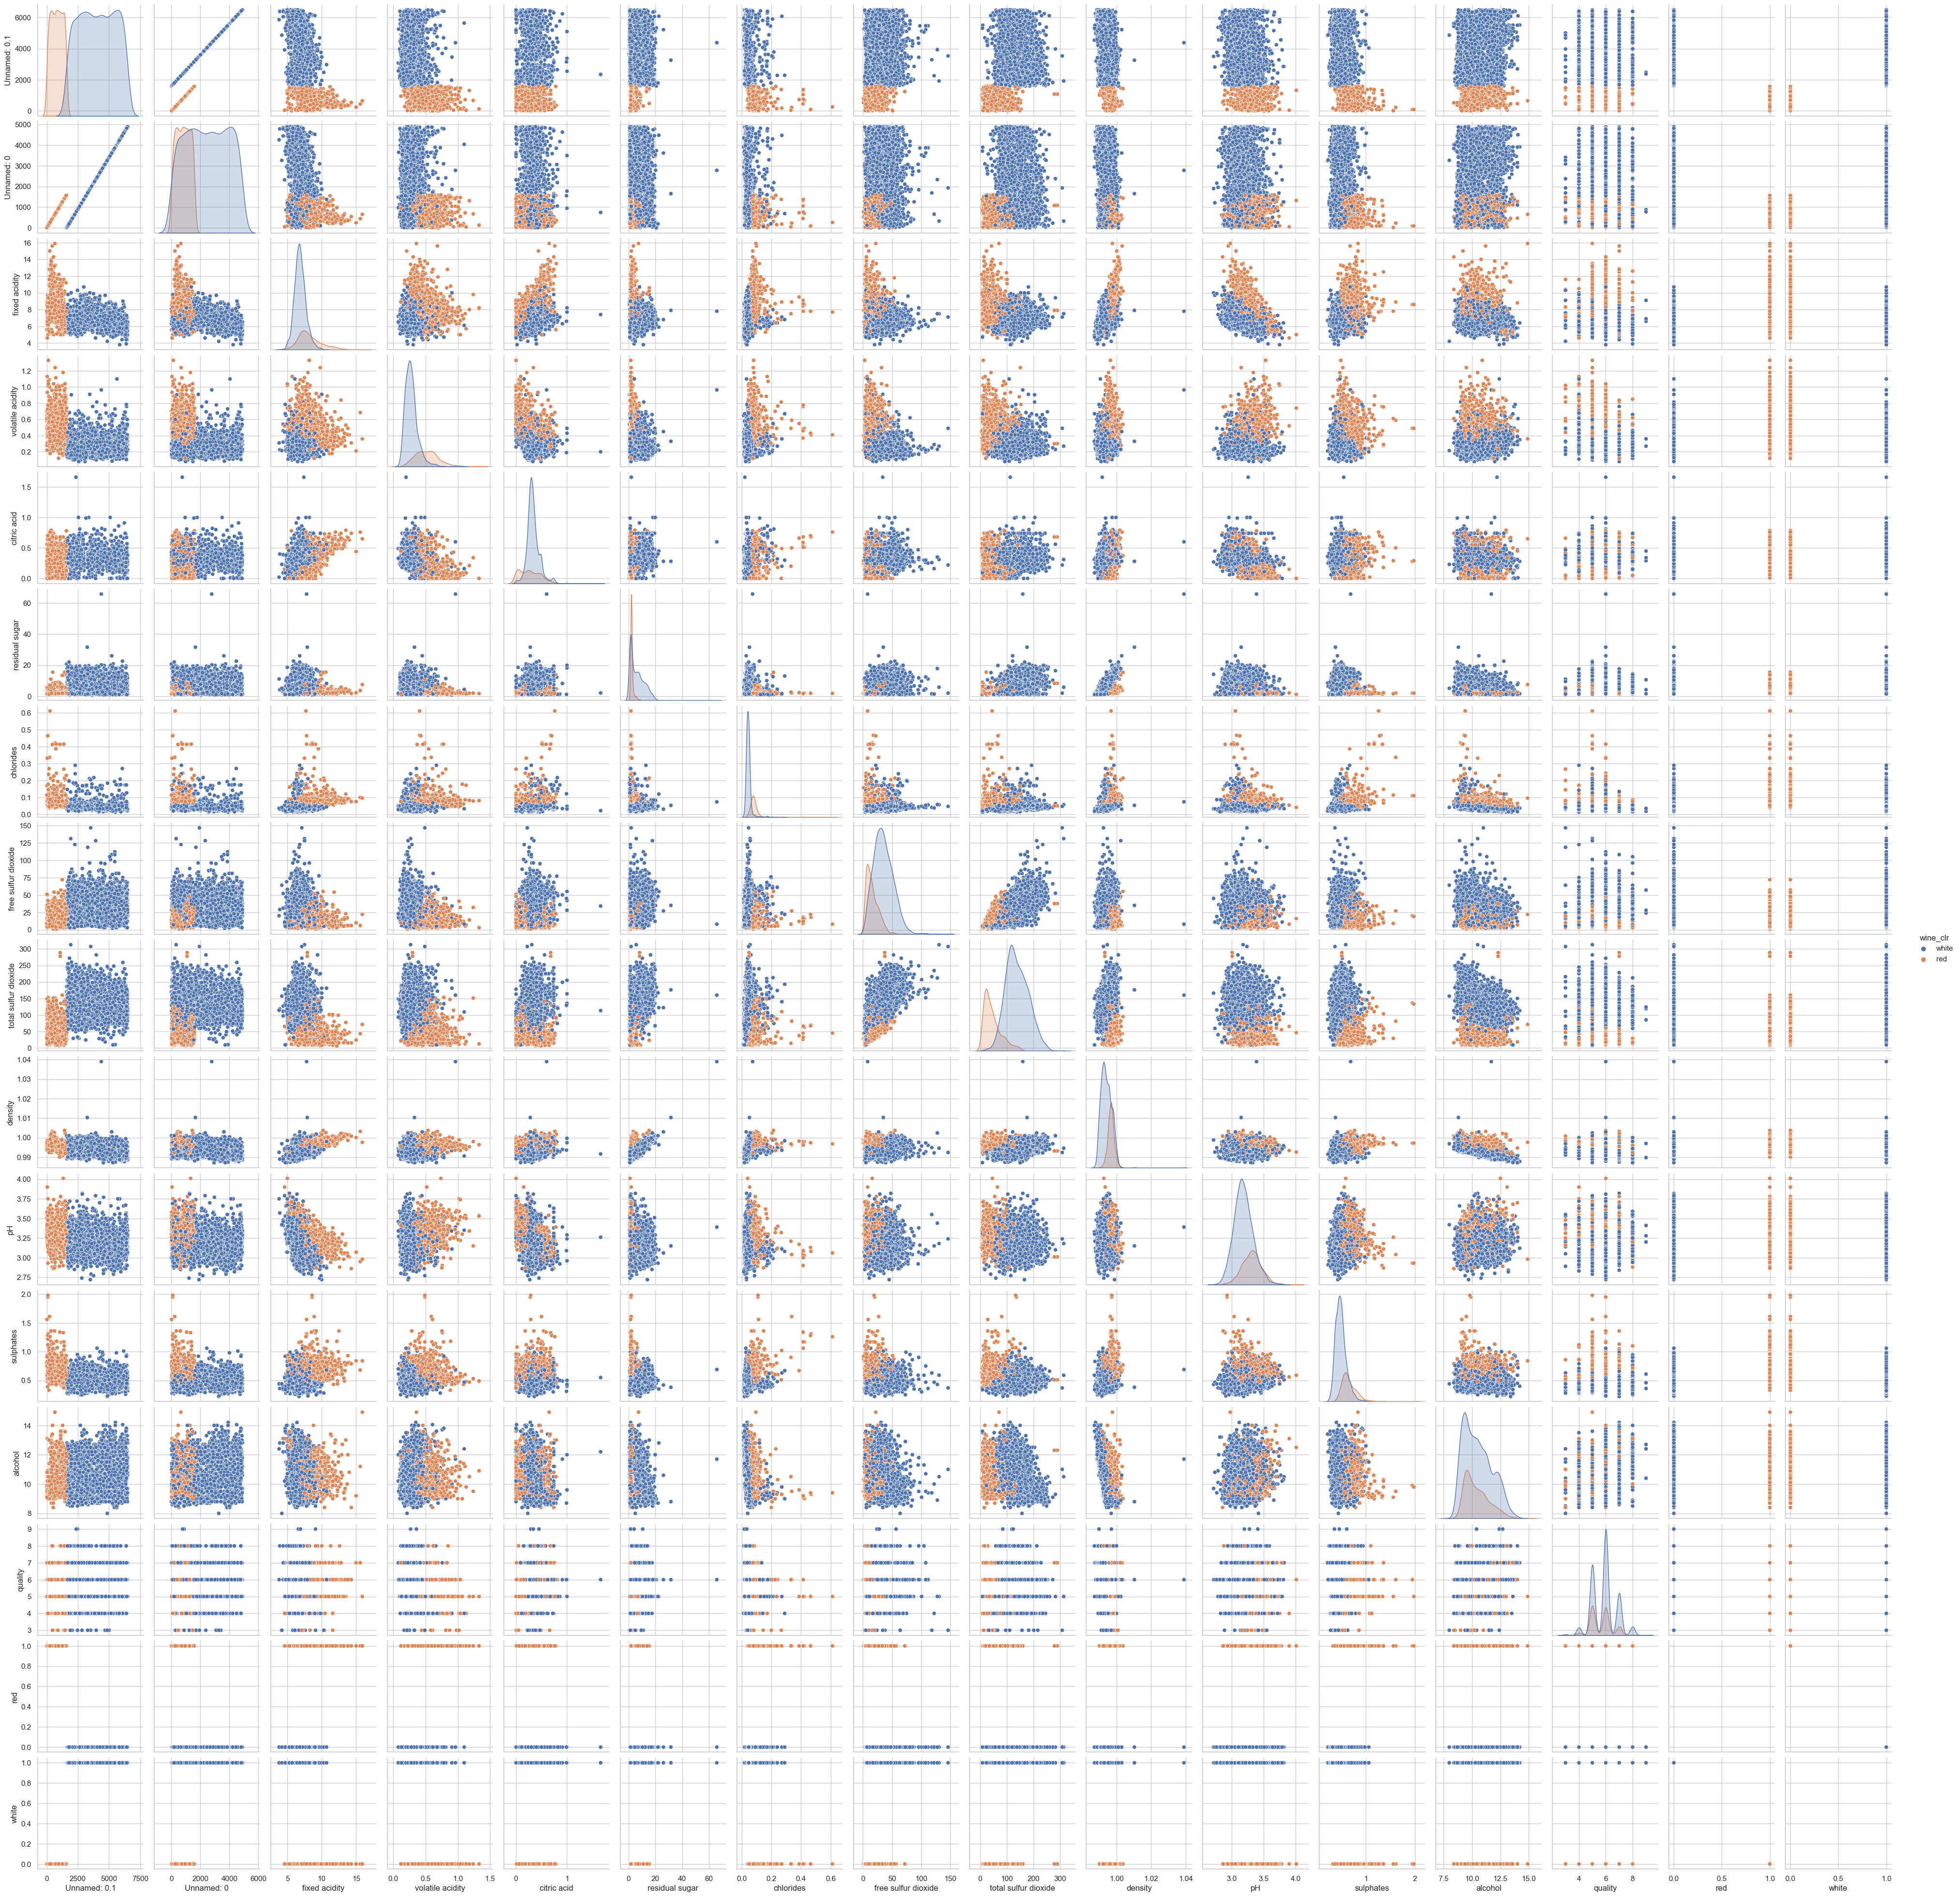

In [29]:
sns.pairplot(train, hue='wine_clr')

What is the distribution of all of the variables?

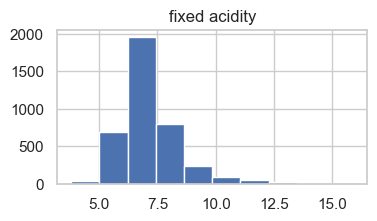

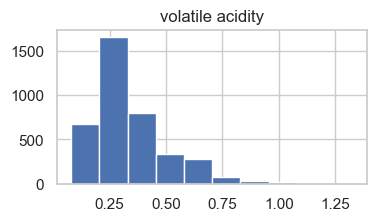

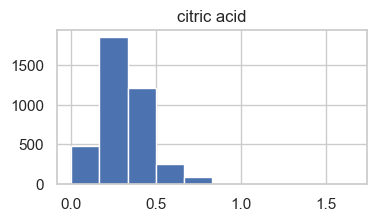

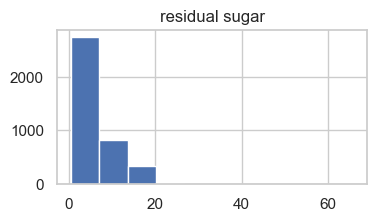

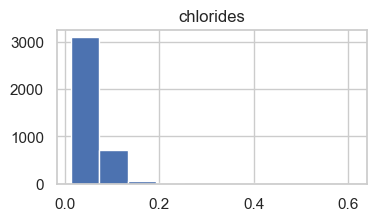

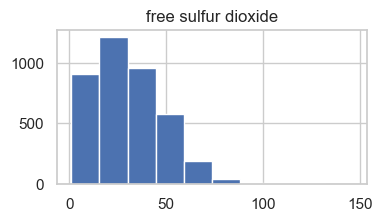

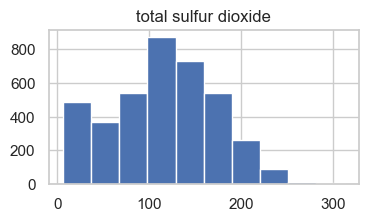

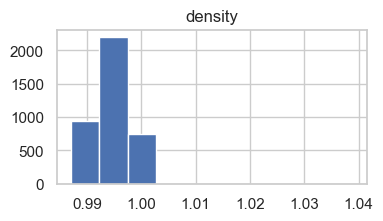

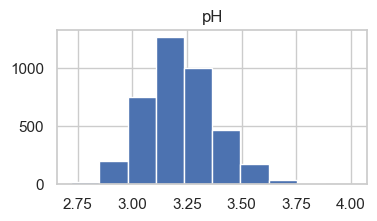

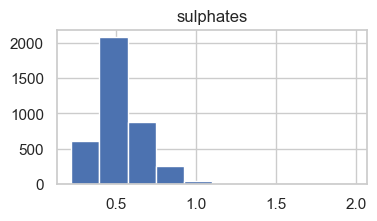

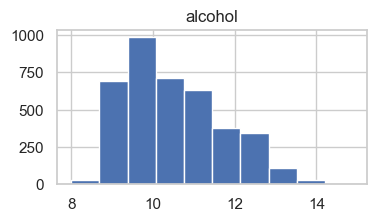

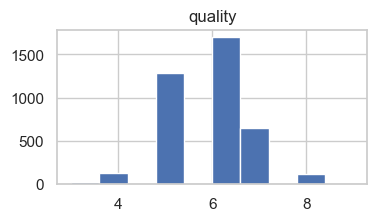

In [53]:
for col in train.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','wine_clr', 'red', 'white']).columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()


1. Is the quality score different for red and white wines?

In [49]:
train.groupby(by='wine_clr').quality.mean()

wine_clr
red      5.632549
white    5.880479
Name: quality, dtype: float64

<Axes: xlabel='wine_clr', ylabel='quality'>

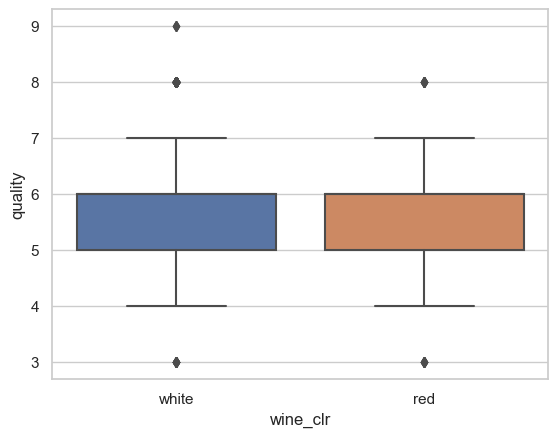

In [50]:
sns.boxplot(x=train.wine_clr, y= train.quality)


What is the distribution of the target variable?

Calculate the frequency or proportion of the targe instances in the 'target' column.

In [57]:
stats.ttest_ind(train[train.wine_clr=='red'].quality, 
                train[train.wine_clr=='white'].quality, 
                equal_var=True
               )

Ttest_indResult(statistic=-7.736501835735896, pvalue=1.2928338120638716e-14)

In [48]:
train.head()

Unnamed: 0.1  Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
0          3737        2138            5.5              0.24         0.32   
1          5134        3535            6.4              0.28         0.44   
2          1990         391            6.5              0.36         0.32   
3          4603        3004            6.3              0.18         0.36   
4          4013        2414            6.2              0.38         0.18   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             8.7      0.060                 19.0                 102.0   
1             7.1      0.048                 49.0                 179.0   
2             1.1      0.031                 13.0                  66.0   
3             1.2      0.034                 26.0                 111.0   
4             7.4      0.095                 28.0                 195.0   

   density    pH  sulphates  alcohol  quality wine_clr  red  white  
0  0.99400  3.27       0.31     10.4        5    white    0      1  
1  0.99528  3.15       0.48      9.2        5    white    0      1  
2  0.99160  3.10       0.46     10.6        5    white    0      1  
3  0.99074  3.16       0.51     11.0        6    white    0      1  
4  0.99773  3.53       0.71      9.2        4    white    0      1

What is the distribution of each feature in the dataset?

Plot histograms for numerical variables and count plots for categorical variables to visualize their distributions.

In [46]:
density,  volatile acidity, free sulfur dioxide, alcohol, wine color

## 2. Is there a relationship between density and alcohol?

<Axes: xlabel='density', ylabel='alcohol'>

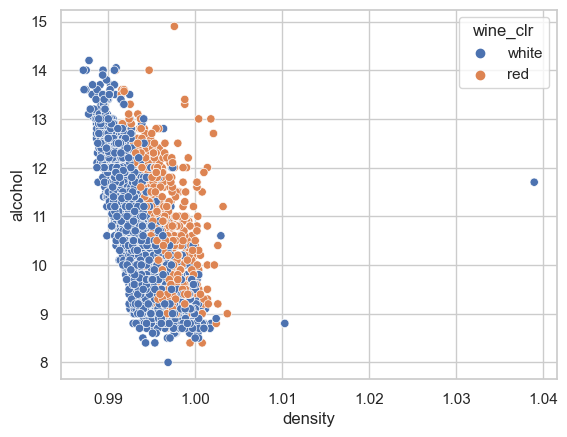

In [59]:
sns.scatterplot(train, x='density', y='alcohol', hue='wine_clr')

$H_0$: There is no linear correlation between density and alcohol levels.

$H_A$: There is a linear correlation between density and alcohol levels.

In [62]:
r, p = stats.pearsonr(train.density, train.alcohol)
print(r ,p)

-0.673783724898091 0.0


There is a strong negative relationship between alcohol level and density.

We reject the null hypothesis.

We also see that red wines on average are more dense than white wines.

### Is there a relationship between density, alcohol levels, and quality rating?

<Axes: xlabel='density', ylabel='quality'>

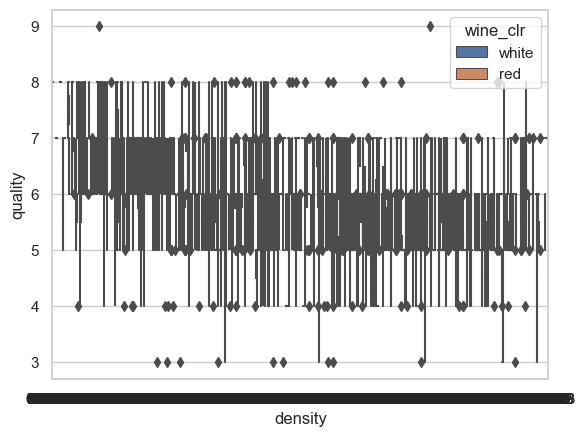

In [76]:
sns.boxplot(train, x='density', y='quality', hue='wine_clr')

## 3. Is there a relationship between volatile acidity and free sulfur dioxide?

<Axes: xlabel='volatile acidity', ylabel='free sulfur dioxide'>

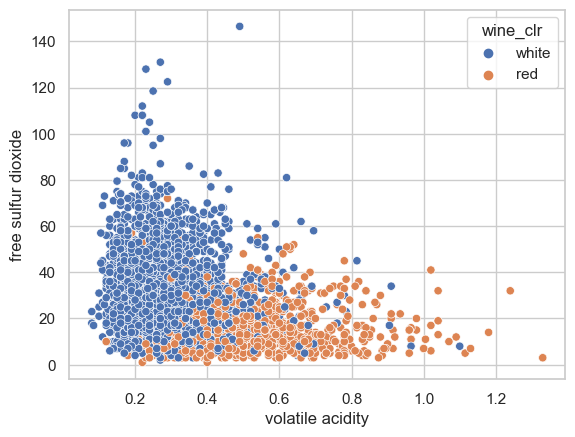

In [64]:
sns.scatterplot(train, x='volatile acidity', y='free sulfur dioxide', hue='wine_clr')

$H_0$: There is no linear correlation between volatile acidity and free sulfur dioxides.

$H_A$: There is a linear correlation between volatile acidity and free sulfur dioxides.

In [66]:
r, p = stats.pearsonr(train['volatile acidity'], train['free sulfur dioxide'])
print(r, p)

-0.34651066818672177 2.3943885581398423e-110


We fail to reject the null hypothesis